## Análise de dados dos filmes exibidos em Londrina, PR

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import to_hex
from datetime import datetime
import seaborn as sns

In [11]:
df_londrina = pd.read_parquet('/Users/bentofh/Documents/GitHub/ancine/arquivos_parquet/Bilheteria_Londrina.parquet')
df_londrina.head(5)

,DT_EXIBICAO,CPB_ROE,TITULO_ORIGINAL,TITULO_BRASILEIRO,PAIS,REGISTRO_GRUPO_EXIBIDOR,REGISTRO_COMPLEXO,REGISTRO_SALA,UF_COMPLEXO,MUNICIPIO_COMPLEXO,RAZAO_SOCIAL_DISTRIBUIDORA,CNPJ_DISTRIBUIDORA,PUBLICO,NOME_SALA
110,27/04/2014,E1402397700000,SON OF GOD,O FILHO DE DEUS,Estados Unidos,6000039.0,18739.0,5003050.0,PR,LONDRINA,DIAMOND FILMS DO BRASIL PRODUÇÃO E DISTRIBUIÇÃ...,17.095.184/0001-13,15,CINE SHOPPING ROYAL 2
302,22/04/2014,E1402397700000,SON OF GOD,O FILHO DE DEUS,Estados Unidos,6000018.0,24767.0,5004265.0,PR,LONDRINA,DIAMOND FILMS DO BRASIL PRODUÇÃO E DISTRIBUIÇÃ...,17.095.184/0001-13,14,SALA 05
390,18/04/2014,E1402397700000,SON OF GOD,O FILHO DE DEUS,Estados Unidos,6000018.0,24767.0,5004265.0,PR,LONDRINA,DIAMOND FILMS DO BRASIL PRODUÇÃO E DISTRIBUIÇÃ...,17.095.184/0001-13,133,SALA 05
392,18/04/2014,E1402397700000,SON OF GOD,O FILHO DE DEUS,Estados Unidos,6000039.0,18739.0,5003050.0,PR,LONDRINA,DIAMOND FILMS DO BRASIL PRODUÇÃO E DISTRIBUIÇÃ...,17.095.184/0001-13,31,CINE SHOPPING ROYAL 2
539,25/02/2014,E1402325900000,THE LEGEND OF HERCULES,HERCULES,Estados Unidos,6000018.0,24767.0,5004265.0,PR,LONDRINA,DIAMOND FILMS DO BRASIL PRODUÇÃO E DISTRIBUIÇÃ...,17.095.184/0001-13,6,SALA 05


In [72]:
# Configurando as cores personalizadas
cores = {
    'roxo'      : '#918EAD',
    'verde'     : '#007573',
    'azul'      : '#8CB9C5',
    'navy'      : '#374375',
    'laranja1'  : '#FDA074',
    'laranja2'  : '#F36400',
    'amarelo'   : '#F9C770',
    'marrom'    : '#895159'
}

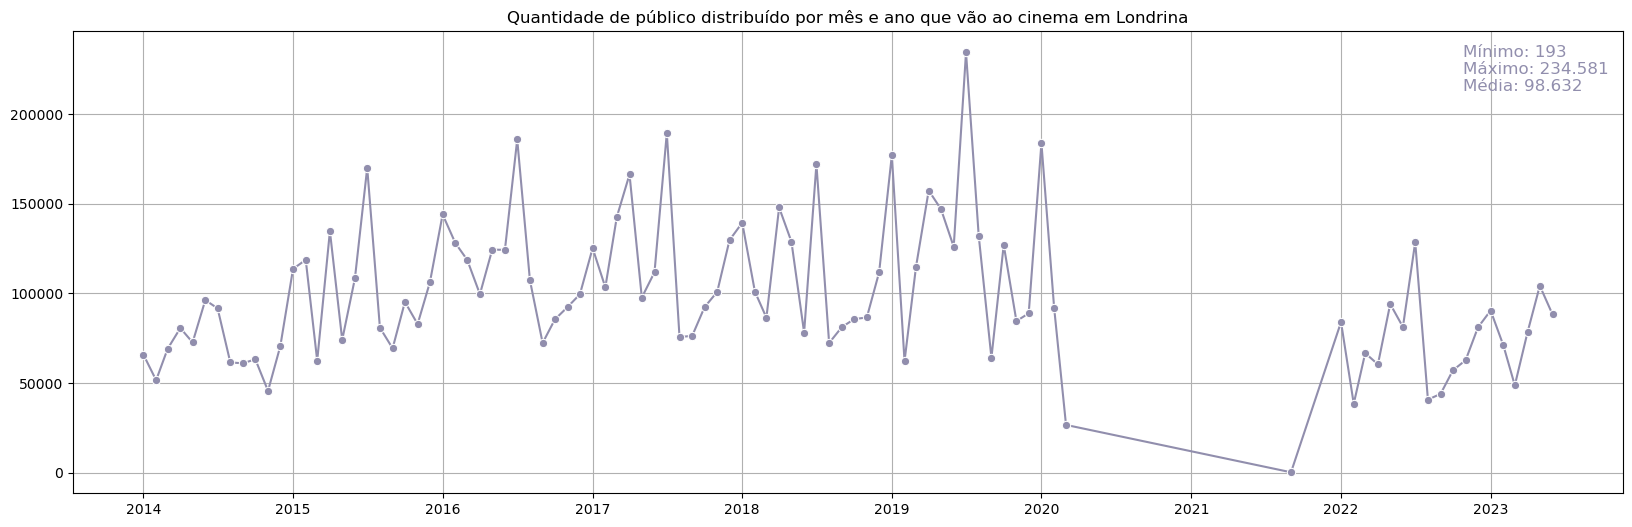

In [77]:
# Agrupar por ano e mês e somar o público
df_agrupado = df_londrina.groupby(df_londrina['DT_EXIBICAO'].dt.to_period("M"))['PUBLICO'].sum()
df_agrupado = df_agrupado.reset_index()
df_agrupado['DT_EXIBICAO'] = df_agrupado['DT_EXIBICAO'].dt.to_timestamp()

# Encontrar os valores mínimo, máximo e média
minimo = df_agrupado['PUBLICO'].min()
maximo = df_agrupado['PUBLICO'].max()
media = df_agrupado['PUBLICO'].mean()

# Criar o gráfico
plt.figure(figsize=(20, 6))
sns.lineplot(data=df_agrupado, x='DT_EXIBICAO', y='PUBLICO', marker='o', color=cores['roxo'])

# Configurações adicionais do gráfico
plt.title('Quantidade de público distribuído por mês e ano que vão ao cinema em Londrina')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(True)

# Texto informativo fora do gráfico
texto_informativo = f'Mínimo: {minimo:,}'.replace(',', '.') + '\n' + \
                    f'Máximo: {maximo:,}'.replace(',', '.') + '\n' + \
                    f'Média: {media:,.0f}'.replace(',', '.')
plt.figtext(0.82, 0.78, texto_informativo, ha='left', fontsize=12, color=cores['roxo'])

# Exibindo o gráfico
plt.show()


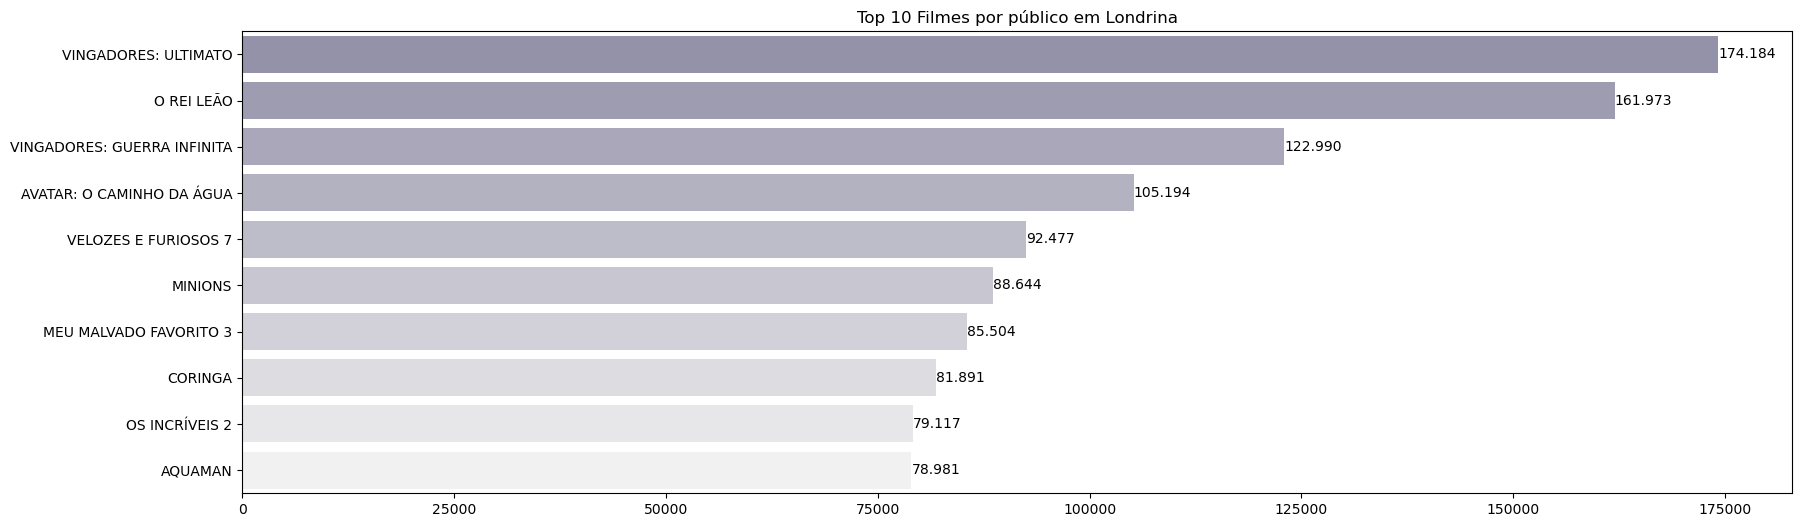

In [107]:
# Agrupar por título brasileiro e somar o público
top_films = df_londrina.groupby('TITULO_BRASILEIRO')['PUBLICO'].sum().sort_values(ascending=False).head(10)

# Gerando paletas de cores de acordo com uma cor base
cor_base = cores['roxo']

# Gerando 10 tons diferentes da cor fornecida
tons = sns.light_palette(cor_base, n_colors=10, reverse=True)

# Convertendo as cores para formato hexadecimal
tons_marrom_top_10 = [to_hex.to_hex(c) for c in tons]

# Definindo a paleta de cores
colors = tons_marrom_top_10

# Criando o gráfico de barras horizontais
plt.figure(figsize=(20, 6))
barplot = sns.barplot(y=top_films.index, x=top_films.values, palette=tons_marrom_top_10)

# Configurações adicionais do gráfico
plt.title('Top 10 Filmes por público em Londrina')
plt.xlabel('')
plt.ylabel('')
plt.grid(False, axis='x')

# Adicionando a soma da audiência em frente às barras
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 3,  # posição x
             p.get_y() + p.get_height() / 2,  # posição y
             f'{width:,.0f}'.replace(',', '.'),  # valor
             ha='left', 
             va='center')

# Exibindo o gráfico
plt.show()

In [117]:
df_2021 = df_londrina[df_londrina['DT_EXIBICAO'].dt.year == 2021]
df_2021.head(100)

,DT_EXIBICAO,CPB_ROE,TITULO_ORIGINAL,TITULO_BRASILEIRO,PAIS,REGISTRO_GRUPO_EXIBIDOR,REGISTRO_COMPLEXO,REGISTRO_SALA,UF_COMPLEXO,MUNICIPIO_COMPLEXO,RAZAO_SOCIAL_DISTRIBUIDORA,CNPJ_DISTRIBUIDORA,PUBLICO,NOME_SALA,ANO
11085257,2021-09-09,E2100139100000,WRATH OF MAN,INFILTRADO,"Estados Unidos, Reino Unido",NaN,NaN,NaN,PR,LONDRINA,WMIX DISTRIBUIDORA LTDA.,03.918.609/0001-32,8,CATUAI 3 - VIP,2021
11085585,2021-09-14,E2100139100000,WRATH OF MAN,INFILTRADO,"Estados Unidos, Reino Unido",NaN,NaN,NaN,PR,LONDRINA,WMIX DISTRIBUIDORA LTDA.,03.918.609/0001-32,15,CATUAI 3 - VIP,2021
11092608,2021-09-12,E2100139100000,WRATH OF MAN,INFILTRADO,"Estados Unidos, Reino Unido",NaN,NaN,NaN,PR,LONDRINA,WMIX DISTRIBUIDORA LTDA.,03.918.609/0001-32,61,CATUAI 3 - VIP,2021
11385337,2021-09-11,E2100139100000,WRATH OF MAN,INFILTRADO,"Estados Unidos, Reino Unido",NaN,NaN,NaN,PR,LONDRINA,WMIX DISTRIBUIDORA LTDA.,03.918.609/0001-32,57,CATUAI 3 - VIP,2021
11519277,2021-09-10,E2100139100000,WRATH OF MAN,INFILTRADO,"Estados Unidos, Reino Unido",NaN,NaN,NaN,PR,LONDRINA,WMIX DISTRIBUIDORA LTDA.,03.918.609/0001-32,13,CATUAI 3 - VIP,2021
11533349,2021-09-13,E2100139100000,WRATH OF MAN,INFILTRADO,"Estados Unidos, Reino Unido",NaN,NaN,NaN,PR,LONDRINA,WMIX DISTRIBUIDORA LTDA.,03.918.609/0001-32,21,CATUAI 3 - VIP,2021
11813550,2021-09-15,E2100139100000,WRATH OF MAN,INFILTRADO,"Estados Unidos, Reino Unido",NaN,NaN,NaN,PR,LONDRINA,WMIX DISTRIBUIDORA LTDA.,03.918.609/0001-32,18,CATUAI 3 - VIP,2021


In [ ]:
    if os.path.isfile(arquivo_csv):
        try:
            df = pd.read_csv(arquivo_csv, encoding='utf8', delimiter=';')
        except UnicodeDecodeError:
            df = pd.read_csv(arquivo_csv, encoding='ISO-8859-1', delimiter=';')
    arquivo_parquet = os.path.join(pasta, f'BilheteriaObrasDia_{ano}.parquet')
    df.to_parquet(arquivo_parquet)

In [120]:
teste = pd.read_csv('/Users/bentofh/Downloads/BilheteriaObrasDia/BilheteriaObrasDia_2021.csv', encoding='ISO-8859-1', delimiter=';')

TypeError: 'numpy.int64' object is not callable